In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd

img=pd.read_csv('train_data.csv') #reading training data
test=pd.read_csv('test_data.csv') #reading testing data

s=test[["ID"]] #storing Class column of test data in a variable to transfer it into submission file afterwards
train_class=img['Class']

# Deleting unncessary columns from training and test file
img.drop('ID', inplace=True, axis=1)
img.drop('Class', inplace=True, axis=1)
test.drop('ID', inplace=True, axis=1)
test.drop('Class', inplace=True, axis=1)


#renaming variables for better understandibility
test_data=test.values
train_data=img.values
train_label=train_class.values


In [ ]:
train_data = train_data.reshape(-1, 50,50, 1)
test_data = test_data.reshape(-1, 50,50, 1)
train_data.shape, test_data.shape

((932, 50, 50, 1), (400, 50, 50, 1))

In [ ]:
train_data.dtype, test_data.dtype

(dtype('int64'), dtype('int64'))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range = 10,
        shear_range = 0.2,
        zoom_range = 0.2,
        #horizontal_flip = True,
        #vertical_flip=True,
        brightness_range = (0.5, 1.5))

In [ ]:
new_train_data=[]
for i in range(len(train_data)):
  new_train_data.append(train_data[i])
print(np.shape(new_train_data))

(932, 50, 50, 1)


In [ ]:
train_data1=[]
train_label1=[]
for i in range(len(new_train_data)):
  for j in range(100):
    new_data=datagen.flow(new_train_data[i].reshape(1,50,50,1))
    new_data=np.reshape(new_data[0],(50,50))
    train_data1.append(new_data)
    train_label1.append(train_label[i])

In [ ]:
np.shape(train_data1)

(93200, 50, 50)

In [ ]:
from sklearn.utils import shuffle
import numpy as np

X = np.array(train_data1)
y = np.array(train_label1)
train_data1, train_label1 = shuffle(X, y)

In [ ]:
train_data1.shape

(93200, 50, 50)

In [ ]:
X_train = train_data1.astype("float32") / 255
X_test = test_data.astype("float32") / 255

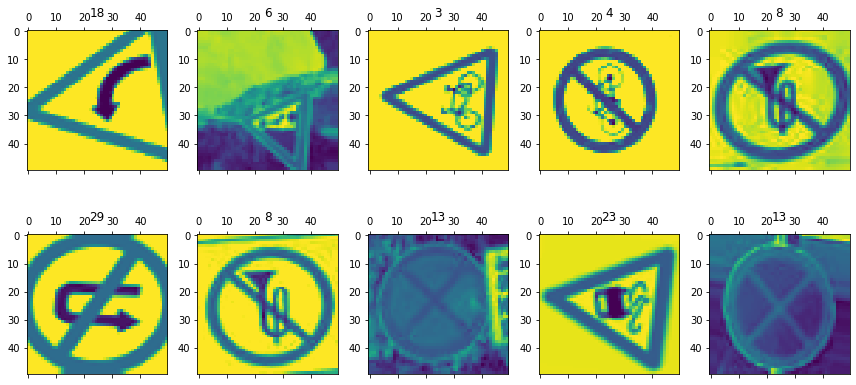

In [ ]:
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_train[n])
        axs[i,j].set(title=train_label1[n])
        n=n+1
plt.show() 

In [ ]:
X_train.shape

(93200, 50, 50)

0.24170854590482593


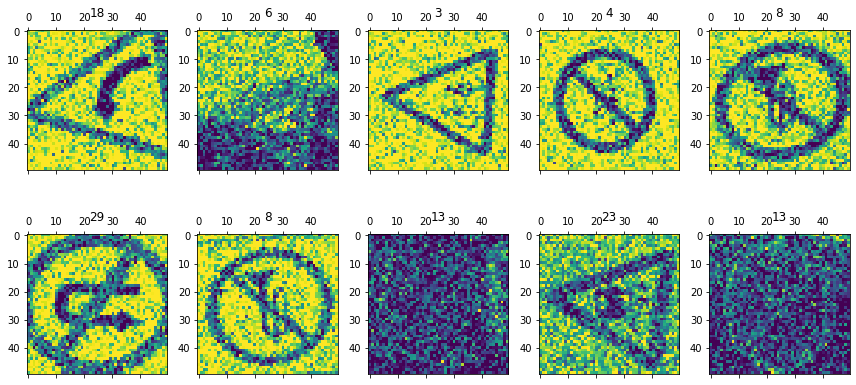

In [ ]:
import random
level_of_noise=random.uniform(0,0.3)
print(level_of_noise)
# Add random noise based on sampling from Gaussian distribution
X_train_noisy = X_train + level_of_noise * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + level_of_noise * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

# Enforce min-max boundaries so it does not go beyond [0,1] range
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Display images of the first 10 digits in the noisy training data
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_train_noisy[n])
        axs[i,j].set(title=train_label1[n])
        n=n+1
plt.show()

In [ ]:
# Reshape input data
X_train = X_train.reshape(len(X_train), 2500)
X_test = X_test.reshape(len(X_test), 2500)

X_train_noisy = X_train_noisy.reshape(len(X_train), 2500)
X_test_noisy = X_test_noisy.reshape(len(X_test), 2500)

# Print shapes
print("New shape of X_train: ", X_train.shape)
print("New shape of X_test: ", X_test.shape)

print("New shape of X_train_noisy: ", X_train_noisy.shape)
print("New shape of X_test_noisy: ", X_test_noisy.shape)

New shape of X_train:  (93200, 2500)
New shape of X_test:  (400, 2500)
New shape of X_train_noisy:  (93200, 2500)
New shape of X_test_noisy:  (400, 2500)


In [ ]:
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Model # for creating a Neural Network Autoencoder model
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense, LeakyReLU, BatchNormalization # for adding layers to DAE model
from tensorflow.keras.utils import plot_model # for plotting model diagram

# Data manipulation
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

# Visualization
import matplotlib 
import matplotlib.pyplot as plt # for plotting model loss
print('matplotlib: %s' % matplotlib.__version__) # print version
import graphviz # for showing model diagram
print('graphviz: %s' % graphviz.__version__) # print version

# Other utilities
import sys
import os

# Assign main directory to a variable
main_dir=os.path.dirname(sys.path[0])
#print(main_dir)

Tensorflow/Keras: 2.8.0
numpy: 1.21.6
matplotlib: 3.2.2
graphviz: 0.10.1


In [ ]:
n_inputs=X_train.shape[1] # number of input neurons = the number of features X_train

#--- Input Layer 
visible = Input(shape=(n_inputs,), name='Input-Layer') # Specify input shape

#--- Encoder Layer
e = Dense(units=n_inputs, name='Encoder-Layer')(visible)
e = BatchNormalization(name='Encoder-Layer-Normalization')(e)
e = LeakyReLU(name='Encoder-Layer-Activation')(e)

#--- Middle Layer
middle = Dense(units=n_inputs, activation='linear', activity_regularizer=keras.regularizers.L1(0.0001), name='Middle-Hidden-Layer')(e)

#--- Decoder Layer
d = Dense(units=n_inputs, name='Decoder-Layer')(middle)
d = BatchNormalization(name='Decoder-Layer-Normalization')(d)
d = LeakyReLU(name='Decoder-Layer-Activation')(d)

#--- Output layer
output = Dense(units=n_inputs, activation='sigmoid', name='Output-Layer')(d)

# Define denoising autoencoder model
model = Model(inputs=visible, outputs=output, name='Denoising-Autoencoder-Model')

# Compile denoising autoencoder model
model.compile(optimizer='adam', loss='mse')

# Print model summary
print(model.summary())

# Plot the denoising autoencoder model diagram
#plot_model(model, to_file=main_dir+'/pics/Denoising_Autoencoder.png', show_shapes=True, dpi=300)

Model: "Denoising-Autoencoder-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input-Layer (InputLayer)    [(None, 2500)]            0         
                                                                 
 Encoder-Layer (Dense)       (None, 2500)              6252500   
                                                                 
 Encoder-Layer-Normalization  (None, 2500)             10000     
  (BatchNormalization)                                           
                                                                 
 Encoder-Layer-Activation (L  (None, 2500)             0         
 eakyReLU)                                                       
                                                                 
 Middle-Hidden-Layer (Dense)  (None, 2500)             6252500   
                                                                 
 Decoder-Layer (Dense)       (None, 250

Epoch 1/20
2913/2913 [==============================] - 28s 8ms/step - loss: 0.0438 - val_loss: 0.0323
Epoch 2/20
2913/2913 [==============================] - 24s 8ms/step - loss: 0.0209 - val_loss: 0.0288
Epoch 3/20
2913/2913 [==============================] - 24s 8ms/step - loss: 0.0147 - val_loss: 0.0175
Epoch 4/20
2913/2913 [==============================] - 24s 8ms/step - loss: 0.0122 - val_loss: 0.0160
Epoch 5/20
2913/2913 [==============================] - 24s 8ms/step - loss: 0.0114 - val_loss: 0.0151
Epoch 6/20
2913/2913 [==============================] - 24s 8ms/step - loss: 0.0109 - val_loss: 0.0137
Epoch 7/20
2913/2913 [==============================] - 25s 8ms/step - loss: 0.0105 - val_loss: 0.0128
Epoch 8/20
2913/2913 [==============================] - 25s 8ms/step - loss: 0.0102 - val_loss: 0.0138
Epoch 9/20
2913/2913 [==============================] - 25s 9ms/step - loss: 0.0099 - val_loss: 0.0120
Epoch 10/20
2913/2913 [==============================] - 24s 8ms/step - l

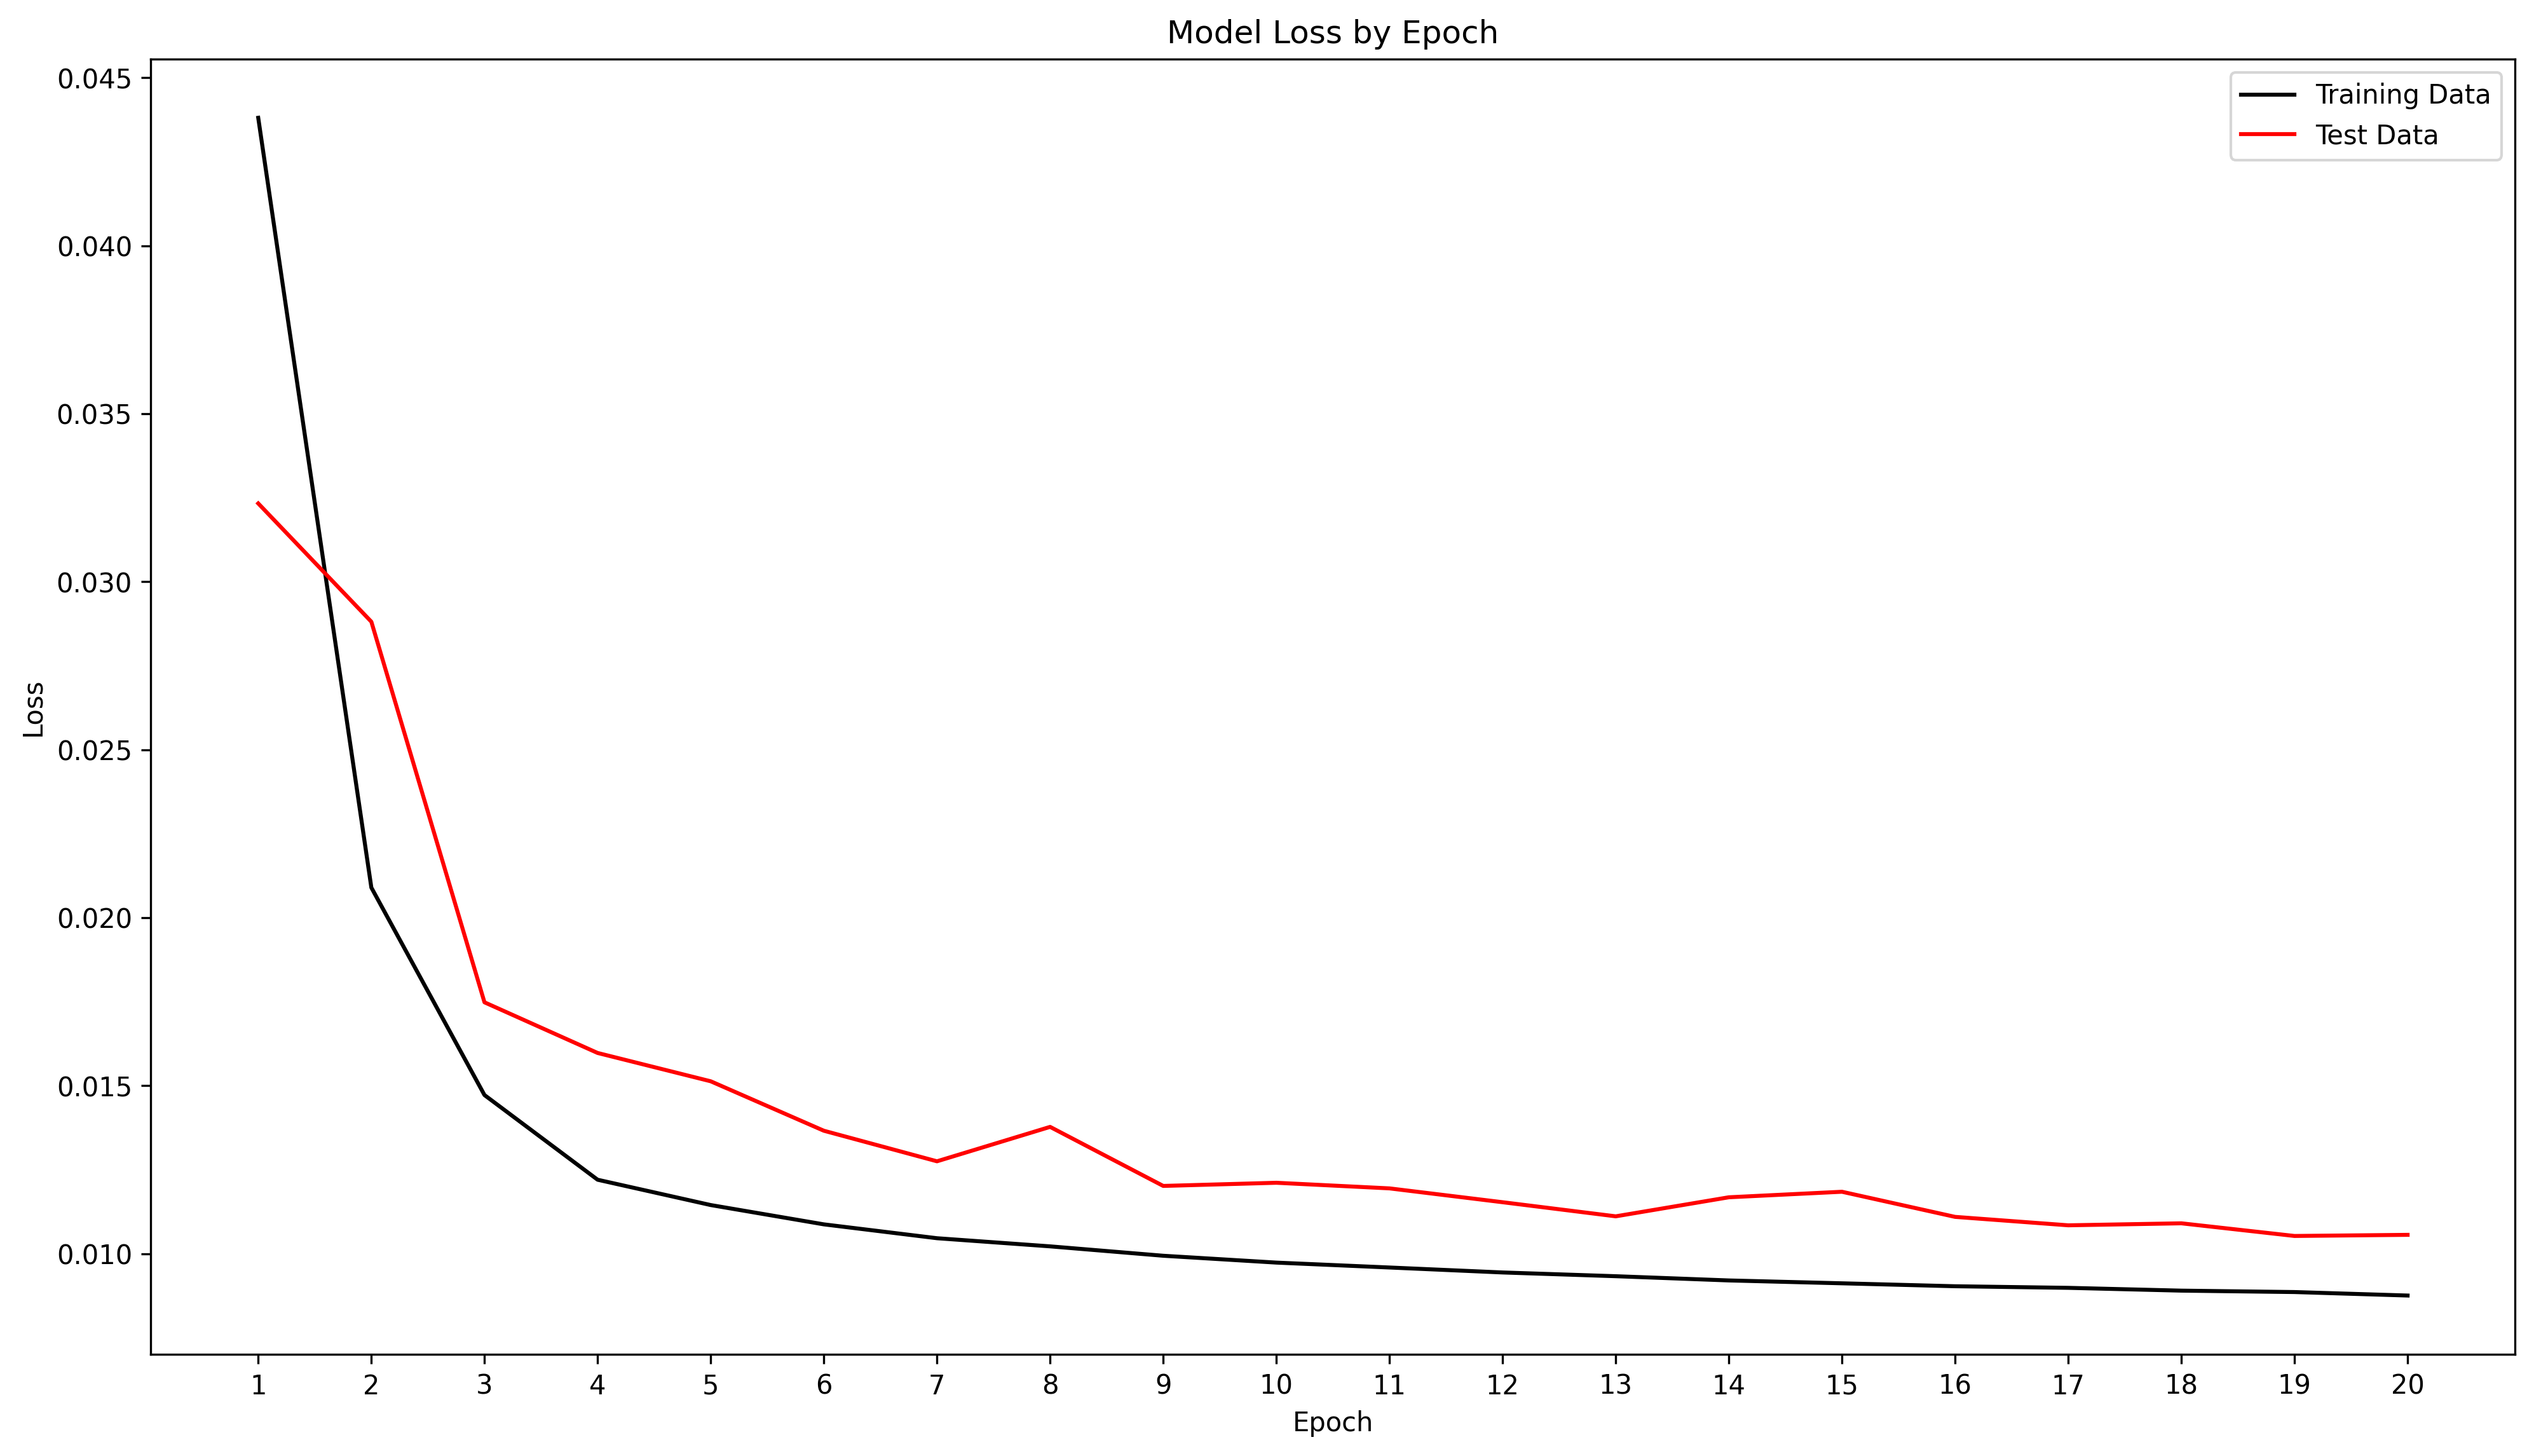

In [ ]:
# Fit the Denoising autoencoder model to reconstruct original images
history = model.fit(X_train_noisy, X_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test_noisy, X_test))

# Plot a loss chart
fig, ax = plt.subplots(figsize=(16,9), dpi=300)
plt.title(label='Model Loss by Epoch', loc='center')

ax.plot(history.history['loss'], label='Training Data', color='black')
ax.plot(history.history['val_loss'], label='Test Data', color='red')
ax.set(xlabel='Epoch', ylabel='Loss')
plt.xticks(ticks=np.arange(len(history.history['loss'])), labels=np.arange(1, len(history.history['loss'])+1))
plt.legend()

plt.show()

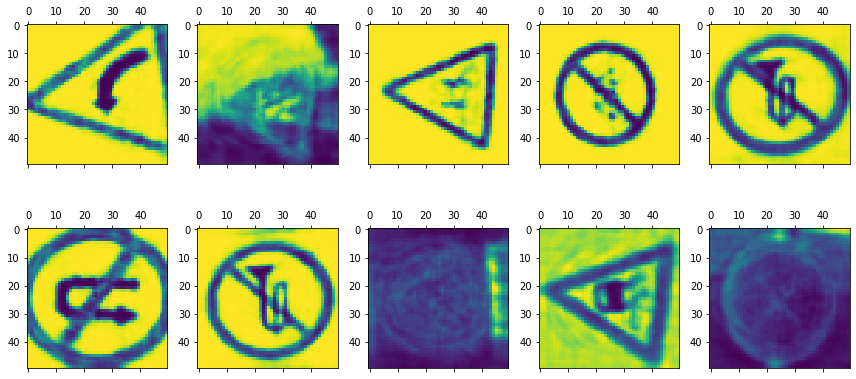

In [ ]:
X_train_denoised = model.predict(X_train).reshape(len(X_train), 50, 50)
# Display images of the first 10 digits
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_train_denoised[n])
        #axs[i,j].set(title=y_test[n])
        n=n+1
plt.show() 

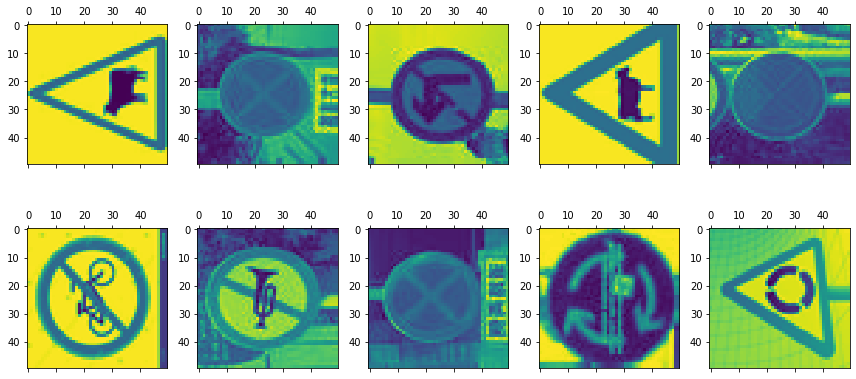

In [ ]:
# Reshape back
X_test_back = X_test.reshape(400, 50, 50)

# Display images of the first 10 digits
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_test_back[n])
        #axs[i,j].set(title=y_test[n])
        n=n+1
plt.show() 

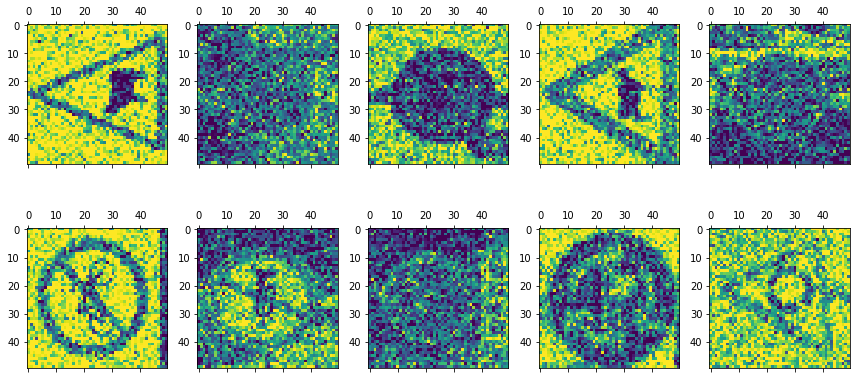

In [ ]:
# Reshape back
X_test_noisy_reshaped = X_test_noisy.reshape(400, 50, 50)

# Display images of the first 10 digits
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_test_noisy_reshaped[n])
        #axs[i,j].set(title=y_test[n])
        n=n+1
plt.show() 

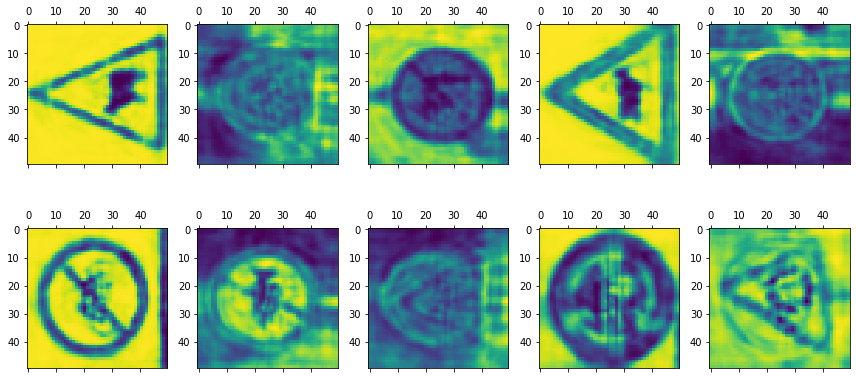

In [ ]:
# Apply denoising model 
#X_train_denoised = model.predict(X_train_noisy).reshape(60000, 28, 28)
X_test_denoised = model.predict(X_test_noisy).reshape(400, 50, 50)

# Display images of the first 10 digits
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_test_denoised[n])
        #axs[i,j].set(title=y_test[n])
        n=n+1
plt.show() 

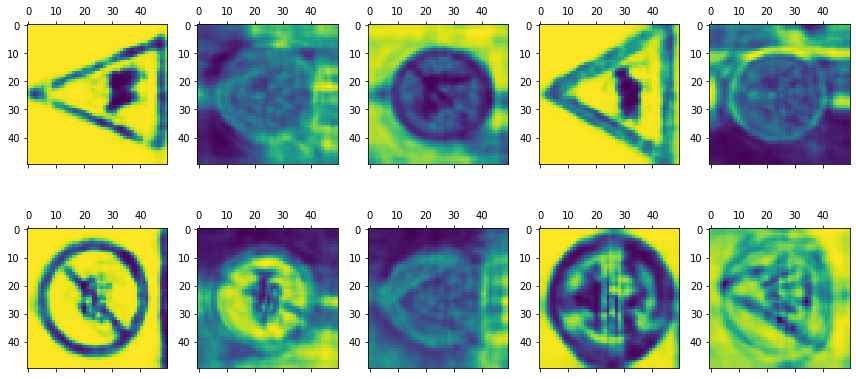

In [ ]:
# Apply denoising model 
#X_train_denoised = model.predict(X_train_noisy).reshape(60000, 28, 28)
X_test_denoised = model.predict(X_test_denoised.reshape(400,2500)).reshape(400, 50, 50)

# Display images of the first 10 digits
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_test_denoised[n])
        #axs[i,j].set(title=y_test[n])
        n=n+1
plt.show() 

In [ ]:
import tensorflow as tf
from keras import layers, models
cnn1 =models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(5,5),activation="relu",input_shape=(50,50,1)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(rate=0.25),
    layers.Conv2D(filters=64,kernel_size=(5,5),activation="relu"),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(rate=0.35),
    
    layers.Flatten(),
    layers.Dense(256,activation="relu"),
    layers.Dropout(rate=0.5),
    layers.BatchNormalization(),
    layers.Dense(512,activation="relu"),
    layers.Dropout(rate=0.3),
    
    layers.Dense(31,activation="softmax")])

In [ ]:
cnn1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
X_train_denoised=X_train_denoised.reshape(-1,50,50)
X_train_denoised.shape
train_label1.shape

(93200,)

In [ ]:
cnn1.fit(X_train_denoised, train_label1, epochs=50)

Epoch 1/50
2913/2913 [==============================] - 18s 6ms/step - loss: 1.0352 - accuracy: 0.7048
Epoch 2/50
2913/2913 [==============================] - 17s 6ms/step - loss: 0.4213 - accuracy: 0.8763
Epoch 3/50
2913/2913 [==============================] - 17s 6ms/step - loss: 0.2859 - accuracy: 0.9169
Epoch 4/50
2913/2913 [==============================] - 16s 6ms/step - loss: 0.2263 - accuracy: 0.9340
Epoch 5/50
2913/2913 [==============================] - 17s 6ms/step - loss: 0.1924 - accuracy: 0.9450
Epoch 6/50
2913/2913 [==============================] - 17s 6ms/step - loss: 0.1674 - accuracy: 0.9521
Epoch 7/50
2913/2913 [==============================] - 17s 6ms/step - loss: 0.1499 - accuracy: 0.9572
Epoch 8/50
2913/2913 [==============================] - 17s 6ms/step - loss: 0.1392 - accuracy: 0.9613
Epoch 9/50
2913/2913 [==============================] - 16s 6ms/step - loss: 0.1247 - accuracy: 0.9649
Epoch 10/50
2913/2913 [==============================] - 17s 6ms/step - l

In [ ]:
y_test=pd.read_csv('Book1.csv') #reading testing data
y_test=y_test.values
y_test=y_test.reshape(-1)

In [ ]:
y_test
b = np.zeros((y_test.size, y_test.max() + 1))
b[np.arange(y_test.size), y_test] = 1
np.shape(y_test)

(400,)

In [ ]:
X_test_denoised=X_test_denoised.reshape(-1,50,50)
X_test=X_test.reshape(-1,50,50)

In [ ]:
test_eval = cnn1.evaluate(X_test, y_test, verbose=0)
test_eval[1]

In [ ]:
cnn_predictions=cnn1.predict(X_test)
cnn_pred=[np.argmax(i) for i in cnn_predictions]
test=pd.read_csv('test_data.csv')
s=test[["ID"]]
s['Class']=cnn_pred
s.to_csv("submissioncnn.csv",index=None)